In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


- training set is made of 60,000 images
- each image size is 28 x 28
- the target is a one-dimensional array with 60000 elements.

In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [5]:
np.unique(x_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

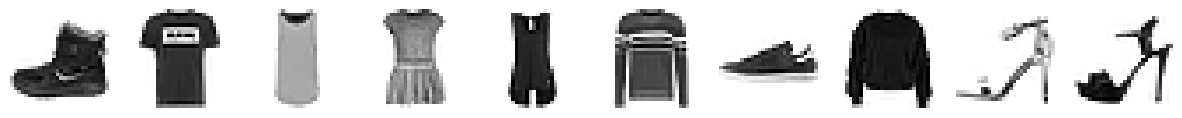

In [6]:
# check the sample images

fig, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    #axs[i].set_title(y_train[i])
    axs[i].axis('off')

plt.show()

In [7]:
# check dependent variables
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 0: t-shirt
- 1: Pants
- 2: sweater
- 3: Dress
- 4: coat
- 5: sandals
- 6: Shirt
- 7: Sneakers
- 8: bag
- 9 : ankle boots

In [8]:
# check number of data of each label -> check if we have to stratify
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- each label has 6000 images each -> all good!



# Fashion item classification using stochastic gradient descent

In [9]:
# Since SGDClassifier cannot handle 2-dimensional input, convert the data to a 1-dimensional array
scaled_train = x_train / 255 # Each pixel has an integer value between 0 and 255
scaled_train = scaled_train.reshape(-1, 28 * 28)

In [10]:
print(scaled_train.shape)

(60000, 784)


In [11]:
sgd = SGDClassifier(loss="log_loss", max_iter=5, random_state=14)
scores = cross_validate(sgd, scaled_train, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.7893333333333332


# Neural Network
- Logistic regression equation
    - z_T-shirt = w1 * pixel1 + w2 * pixel2 + ...... + w784 * pixel784 + b
    - z_pants = w1' * pixel1 + w2' * pixel2 + ...... + w784' * pixel784 + b'

- Since the softmax of logistic regression is used in place of the activation function, probability values ​​for 10 labels from z1 to z10 are calculated.
    - Because the class is predicted based on neurons from z1 to z10, it is called the output layer in the sense that it creates the final value of the neural network.
    
- In neural networks, the unit that calculates the z value is called a neuron.
    - Currently, "unit" is used instead of neuron.
    
- x_1 to x_784 is called the input layer
    - The input layer is the pixel value itself and does not perform any special calculations.
    
- neural networks began with the neuron model proposed by Warren McCulloch and Walter Pitts in 1943.
    - These are called McCullough-Fitz neurons.
    - Artificial neurons are inspired by biological neurons.
    
    1. Biological neurons receive signals from dendrites and collect them in the cell body
    2. When the signal reaches a certain threshold, the signal is transmitted to other cells through the axon.

In [12]:
# Divide only the verification set using the data created above
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                            test_size = 0.2, random_state = 14,
                                                            stratify = y_train)

In [13]:
print(scaled_train.shape, y_train.shape)

(48000, 784) (48000,)


In [14]:
print(scaled_val.shape, y_val.shape)

(12000, 784) (12000,)


# Dense Layer

- A layer where all 784 pixels and 10 output layer units are connected
- Because both units are connected, it is also called a fully connected layer.

In [15]:
# Parameters of the Dense class = number of units, activation function to apply to the output, size of the input
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784,))

- Number of units = 10
    - Because there are 10 labels
    
- Activation function = softmax
    - Use softmax to convert the values ​​output from 10 units into probability values.
    - If it is a binary classification problem, it is also possible to set the activation function to a sigmoid function.
        - activation = "sigmoid"
        
- input size = (784,)
    - Specify with a tuple how many inputs each of the 10 units receives.
    - In the current example, input (784,) because 784 pixel values ​​are received in one dimension.

In [17]:
# Create a neural network model
model = keras.Sequential()
# Sequential -> linear stack of layers into a Model

In [18]:
# add the dense layer to our model
model.add(dense)

In [19]:
# check our model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Set up the learning process to train the model
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

- loss = "sparse_categorical_crossentropy"
    - sparse_categorical_crossentropy: loss function mainly used in multi-classification
        - A loss function that makes the probability of a correct answer close to 1 and the probability of an incorrect answer close to 0.
        - sparse categorical cross-entropy loss expects the target labels to be integers indicating the class indices directly
    - In binary classification, binary_crossentropy is used.
    
- metrics = ["accuracy"]
    - Keras outputs the loss value every epoch by default when the model is trained.
    - Specify the indicator accuracy to display accuracy in addition to loss value.

In [23]:
# train the model
model.fit(scaled_train, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6111 - accuracy: 0.7902
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4781 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4530 - accuracy: 0.8464
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4399 - accuracy: 0.8500
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4319 - accuracy: 0.8545


In [24]:
# accuracy with validation data
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8519


[0.4329933822154999, 0.8519166707992554]